# Employee Retention
## Data and Problem:
 - Use the raw data github link: https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv 
 
 - Load libraries and data
 - Do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. **whether they leave the company or continue to work**)
 - Plot bar charts showing impact of employee salaries on retention
 - See the correlation between department and employee retention
 - Separate dependent and independent variables
 - Split the data into train set and test set
 - Now build Logistic Regression model and do prediction for test data
 - Measure the accuracy of the model


In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To print some colored text output:
class fontstyle:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   BRIGHTGREEN = '\033[32m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BACKGROUNDYELLOW = '\033[43m'
   END = '\033[0m'

# Use the following to print colored and bold text
# print(fontstyle.BOLD + fontstyle.UNDERLINE +  fontstyle.CYAN + fontstyle.BACKGROUNDYELLOW + 'Hello World !' + fontstyle.END)

In [2]:
# Load data.

# In read_csv() function, we have passed the raw data link at github
data_location = "https://raw.githubusercontent.com/dphi-official/Datasets/master/HR_comma_sep.csv"
data = pd.read_csv(data_location)

# Exploratory data analysis 

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.shape
dataOriginalRow = data.shape[0]
dataOriginalRow

14999

### Missing Data

In [5]:
# Any Missing data
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

**This means there is no missing data**

In [6]:
# How many employee left the job?
data.left.sum()

3571

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Data preparation

In [8]:
duplicate_entries = data[data.duplicated()]
duplicate_entries.shape

(3008, 10)

In [9]:
duplicate_entries.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
data = data.drop_duplicates()
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
data.shape

(11991, 10)

In [12]:
dataOriginalRow-(duplicate_entries.shape[0])

11991

In [13]:
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:
data.Department.value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

In [15]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [16]:
data.salary.value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [17]:
# Forgot the value of False and True? No, problem!
False + False, True + True, True + False

(0, 2, 1)

In [18]:
data['left'] = data['left'].replace([0,1],['No','Yes'])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,Yes,0,sales,low
1,0.80,0.86,5,262,6,0,Yes,0,sales,medium
2,0.11,0.88,7,272,4,0,Yes,0,sales,medium
3,0.72,0.87,5,223,5,0,Yes,0,sales,low
4,0.37,0.52,2,159,3,0,Yes,0,sales,low


In [19]:
data.left.value_counts()

No     10000
Yes     1991
Name: left, dtype: int64


#### Plot bar charts showing impact of employee salaries on retention

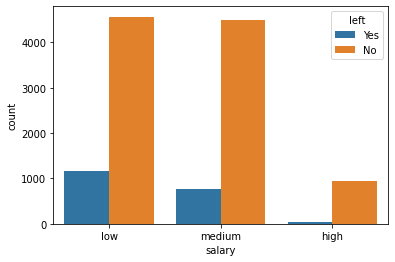

In [20]:
ax = sns.countplot(x="salary", hue="left", data=data)

It seems that **salary** may be an important variable in job retention.


#### Plot bar charts showing impact of different departments on retention

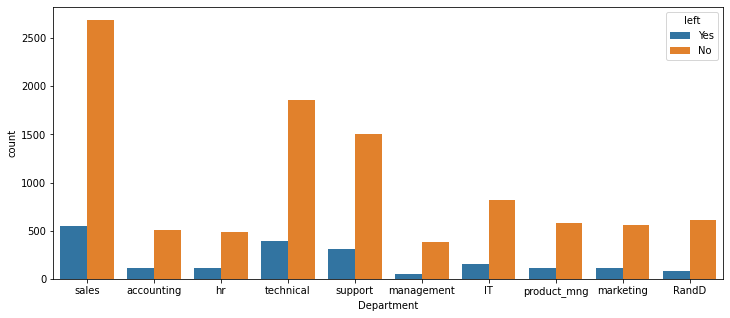

In [21]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Department", hue="left", data=data)

It seems that **Department** may be an important variable in job retention.


#### Plot bar charts showing impact of average_montly_hours on retention

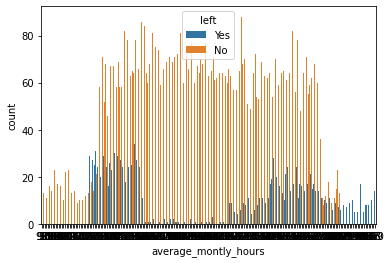

In [22]:
ax = sns.countplot(x="average_montly_hours", hue="left", data=data)

It is not clear if **average_montly_hours** is an important varioable in job retention

#### Plot bar charts showing impact of number_project on retention

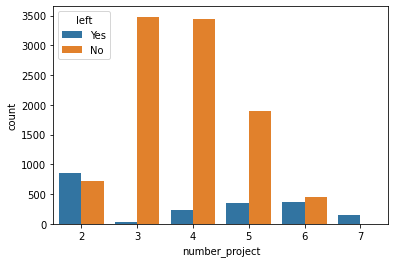

In [23]:
ax = sns.countplot(x="number_project", hue="left", data=data)

It is not clear if **number_project** is an important varioable in job retention

#### Outliers

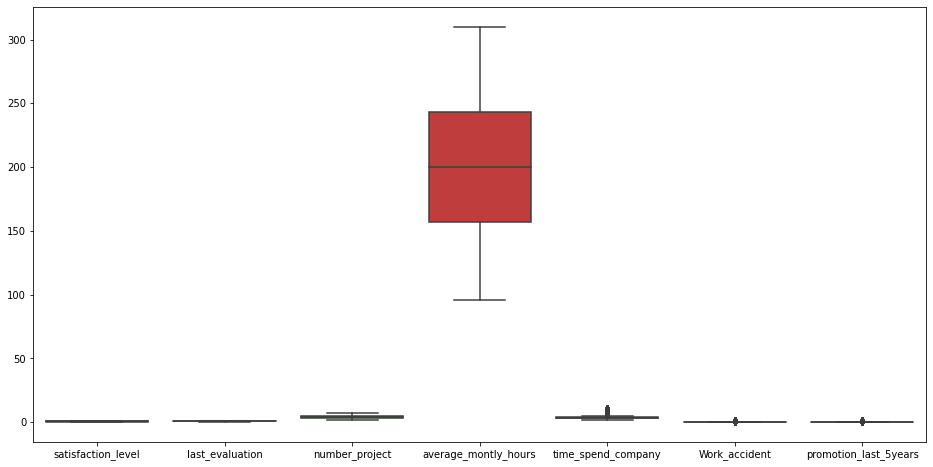

In [24]:
# Boxplot all numerical columns
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=data)

In [25]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['satisfaction_level'].mean()
# calculate the standard deviation
std = data['satisfaction_level'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['satisfaction_level'] < ll) | (data['satisfaction_level'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **satisfaction_level** per Standard deviation method

In [26]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['satisfaction_level'].quantile(0.25)                 
q3 = data['satisfaction_level'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['satisfaction_level'] < q1 - whisker_width*iqr) | (data['satisfaction_level'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **satisfaction_level** per IQR method

In [27]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['last_evaluation'].mean()
# calculate the standard deviation
std = data['last_evaluation'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['last_evaluation'] < ll) | (data['last_evaluation'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **last_evaluation** per Standard deviation method

In [28]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['last_evaluation'].quantile(0.25)                 
q3 = data['last_evaluation'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['last_evaluation'] < q1 - whisker_width*iqr) | (data['last_evaluation'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **last_evaluation** per IQR method

In [29]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['number_project'].mean()
# calculate the standard deviation
std = data['number_project'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['number_project'] < ll) | (data['number_project'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **number_project** per Standard deviation method

In [30]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['number_project'].quantile(0.25)                 
q3 = data['number_project'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['number_project'] < q1 - whisker_width*iqr) | (data['number_project'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **number_project** per IQR method

In [31]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['average_montly_hours'].mean()
# calculate the standard deviation
std = data['average_montly_hours'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['average_montly_hours'] < ll) | (data['average_montly_hours'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **average_montly_hours** per Standard deviation method

In [32]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['average_montly_hours'].quantile(0.25)                 
q3 = data['average_montly_hours'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['average_montly_hours'] < q1 - whisker_width*iqr) | (data['average_montly_hours'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **average_montly_hours** per IQR method

In [33]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['time_spend_company'].mean()
# calculate the standard deviation
std = data['time_spend_company'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['time_spend_company'] < ll) | (data['time_spend_company'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11007,0.49,0.67,2,190,8,0,No,0,marketing,medium
11008,0.92,0.99,3,176,8,0,No,0,sales,medium
11009,0.81,0.55,4,217,8,0,No,0,accounting,medium
11010,0.62,0.91,3,269,8,0,No,0,support,medium
11011,0.21,0.70,3,238,8,0,No,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,No,1,management,high
11995,0.90,0.55,3,259,10,1,No,1,management,high
11996,0.74,0.95,5,266,10,0,No,1,management,high
11997,0.85,0.54,3,185,10,0,No,1,management,high


There are **188 outliers for time_spend_company** per Standard deviation method

In [34]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['time_spend_company'].quantile(0.25)                 
q3 = data['time_spend_company'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['time_spend_company'] < q1 - whisker_width*iqr) | (data['time_spend_company'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,Yes,0,sales,medium
17,0.78,0.99,4,255,6,0,Yes,0,sales,low
34,0.84,0.87,4,246,6,0,Yes,0,hr,low
47,0.57,0.70,3,273,6,0,Yes,0,support,low
67,0.90,0.98,4,264,6,0,Yes,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,No,1,management,high
11995,0.90,0.55,3,259,10,1,No,1,management,high
11996,0.74,0.95,5,266,10,0,No,1,management,high
11997,0.85,0.54,3,185,10,0,No,1,management,high


There are **824 outlier for time_spend_company** per IQR method

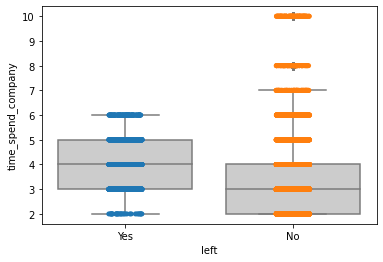

In [35]:
# Let's explore timess_spend_company in more details
#ax = sns.violinplot(x="left", y="time_spend_company", data=data, inner='quartile', color=".8")
ax = sns.boxplot(x="left", y="time_spend_company", data=data, whis = 1.5, color=".8")

ax = sns.stripplot(x="left", y="time_spend_company", data = data)
# ax = sns.swarmplot(y="time_spend_company", data = data, color=".25")

There are more outliers of employees who did **not** leave the job.

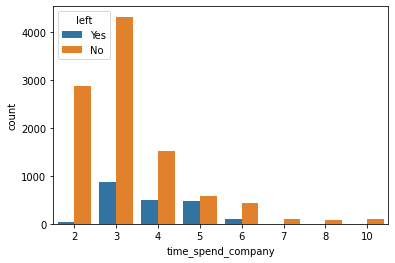

In [36]:
ax = sns.countplot(x="time_spend_company", hue="left", data=data)

It is **not** clear if **time_spend_company** is an important variable in job retention.

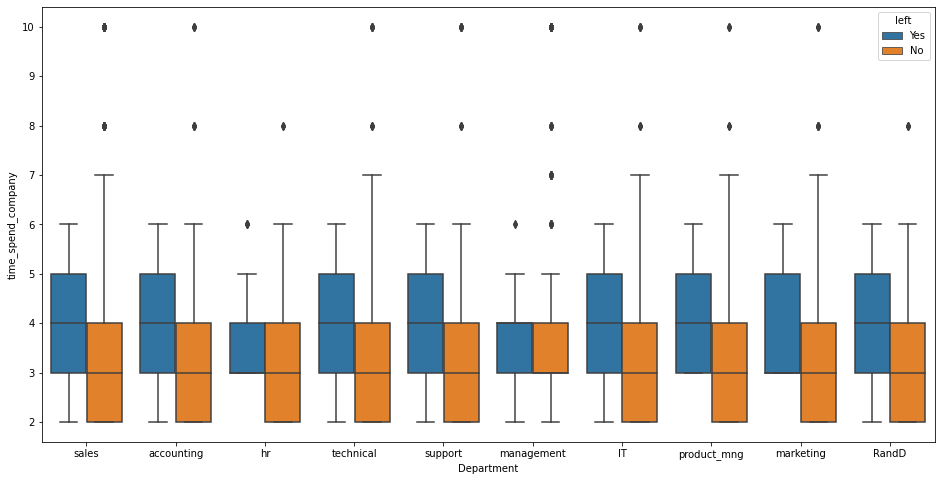

In [37]:
# Explore time_spend_company further w.r.t. Department
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="Department", y="time_spend_company", hue = "left", data=data, whis = 1.5)

**[Important]** It is now clear that employee who left the job spent more time in company, in general. The variable **time_spend_company** for employee who left job is significantly more accross all departments.

In [38]:
# Digress briefly in this block of code to explore salary variable w.r.t. Department through contingency table
pd.crosstab([data.salary, data.Department],data.left)


left                  No  Yes
salary Department            
high   IT             67    4
       RandD          44    3
       accounting     60    3
       hr             35    3
       management    127    1
       marketing      59    3
       product_mng    48    4
       sales         225   12
       support       121    5
       technical     156   10
low    IT            389   87
       RandD         271   51
       accounting    237   59
       hr            234   62
       management    107   32
       marketing     234   76
       product_mng   284   59
       sales        1234  319
       support       676  191
       technical     900  238
medium IT            362   67
       RandD         294   31
       accounting    215   47
       hr            219   48
       management    150   19
       marketing     268   33
       product_mng   244   47
       sales        1230  219
       support       712  116
       technical     798  142

**[Important]** Employee with low and medium salary have left job significantly more in number accross all departments, particularly, in sales, support, and technical departments

In [39]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['Work_accident'].mean()
# calculate the standard deviation
std = data['Work_accident'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['Work_accident'] < ll) | (data['Work_accident'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


There is no outlier for **Work_accident** per Standard deviation method

In [40]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['Work_accident'].quantile(0.25)                 
q3 = data['Work_accident'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['Work_accident'] < q1 - whisker_width*iqr) | (data['Work_accident'] > q3 + whisker_width*iqr)]
outlier

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
18,0.45,0.51,2,160,3,1,Yes,1,sales,low
68,0.76,0.86,5,223,5,1,Yes,0,product_mng,medium
120,0.14,0.62,4,158,4,1,Yes,0,technical,low
123,0.11,0.84,6,300,5,1,Yes,0,support,low
136,0.10,0.84,6,283,4,1,Yes,0,technical,low
...,...,...,...,...,...,...,...,...,...,...
11977,0.62,0.72,3,149,3,1,No,0,marketing,medium
11979,0.52,0.55,5,174,3,1,No,0,sales,medium
11984,0.52,0.61,4,187,4,1,No,0,sales,medium
11992,0.62,0.85,3,237,3,1,No,0,IT,medium


There are **1850 outliers for Work_accident** per IQR method

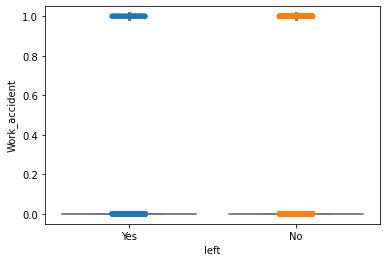

In [41]:
# Let's explore Work_accident in more details
#ax = sns.violinplot(x="left", y="Work_accident", data=data, inner='quartile', color=".8")
ax = sns.boxplot(x="left", y="Work_accident", data=data, whis = 1.5, color=".8")

ax = sns.stripplot(x="left", y="Work_accident", data = data)
# ax = sns.swarmplot(y="Work_accident", data = data, color=".25")


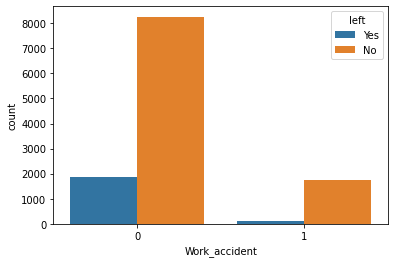

In [42]:
ax = sns.countplot(x="Work_accident", hue="left", data=data)

**Work_accident** may be a controlling factor in job retention

In [43]:
# Standard deviation method for outlier
# calcuate the mean
mean = data['promotion_last_5years'].mean()
# calculate the standard deviation
std = data['promotion_last_5years'].std()
# Lower limit threshold is Mean - 3* SD
ll = mean - (3 * std)
# Higher limit threshold is Mean + 3* SD
hh = mean + (3 * std)

# filter the rows where fare is an outlier. i.e. fare less than the ll or greater than hh
# the usage of & between means it is an and condition
# the usage of | between means it is an or condition
outliers = data[(data['promotion_last_5years'] < ll) | (data['promotion_last_5years'] > hh)]
outliers


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
18,0.45,0.51,2,160,3,1,Yes,1,sales,low
82,0.79,0.59,4,139,3,0,Yes,1,management,low
171,0.41,0.46,2,160,3,0,Yes,1,sales,low
287,0.11,0.79,6,292,4,0,Yes,1,technical,low
584,0.41,0.56,2,154,3,0,Yes,1,support,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,No,1,management,high
11995,0.90,0.55,3,259,10,1,No,1,management,high
11996,0.74,0.95,5,266,10,0,No,1,management,high
11997,0.85,0.54,3,185,10,0,No,1,management,high


In [44]:
# IQR method for outlier
# Calculate Q1, Q2 and IQR
q1 = data['promotion_last_5years'].quantile(0.25)                 
q3 = data['promotion_last_5years'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
# Apply filter with respect to IQR, including optional whiskers
outlier = data[(data['promotion_last_5years'] < q1 - whisker_width*iqr) | (data['promotion_last_5years'] > q3 + whisker_width*iqr)]
outlier


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
18,0.45,0.51,2,160,3,1,Yes,1,sales,low
82,0.79,0.59,4,139,3,0,Yes,1,management,low
171,0.41,0.46,2,160,3,0,Yes,1,sales,low
287,0.11,0.79,6,292,4,0,Yes,1,technical,low
584,0.41,0.56,2,154,3,0,Yes,1,support,medium
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,No,1,management,high
11995,0.90,0.55,3,259,10,1,No,1,management,high
11996,0.74,0.95,5,266,10,0,No,1,management,high
11997,0.85,0.54,3,185,10,0,No,1,management,high


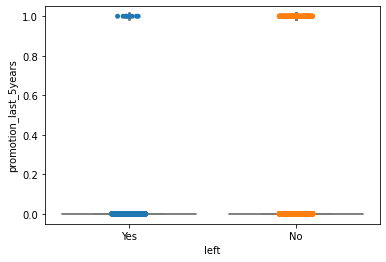

In [45]:
# Let's explore promotion_last_5years in more details
#ax = sns.violinplot(x="left", y="promotion_last_5years", data=data, inner='quartile', color=".8")
ax = sns.boxplot(x="left", y="promotion_last_5years", data=data, whis = 1.5, color=".8")

ax = sns.stripplot(x="left", y="promotion_last_5years", data = data)
# ax = sns.swarmplot(y="promotion_last_5years", data = data, color=".25")


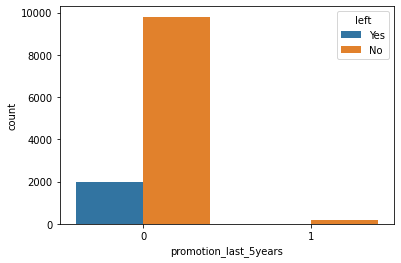

In [46]:
ax = sns.countplot(x="promotion_last_5years", hue="left", data=data)

In [47]:
pd.crosstab(data.promotion_last_5years, data.left)

left,No,Yes
promotion_last_5years,,
0,9805,1983
1,195,8


It seems that **promotion_last_5years** can be a controlling factor in job retention

**[Conclusions]** The outliers that appeared from above analysis are not really outliers. They are resonable values and can be significant in determining the job retention question.

#### One-hot encoding

In [48]:
# Save a copy of original data columns before modifying
data1 = data

dummies = []

cols = ['left', 'Department', 'salary']
for col in cols:
    dummies.append(pd.get_dummies(data[col]))
    employee_retention_dummies = pd.concat(dummies, axis=1)

In [49]:
dummies

[       No  Yes
 0       0    1
 1       0    1
 2       0    1
 3       0    1
 4       0    1
 ...    ..  ...
 11995   1    0
 11996   1    0
 11997   1    0
 11998   1    0
 11999   1    0
 
 [11991 rows x 2 columns],
        IT  RandD  accounting  hr  management  marketing  product_mng  sales  \
 0       0      0           0   0           0          0            0      1   
 1       0      0           0   0           0          0            0      1   
 2       0      0           0   0           0          0            0      1   
 3       0      0           0   0           0          0            0      1   
 4       0      0           0   0           0          0            0      1   
 ...    ..    ...         ...  ..         ...        ...          ...    ...   
 11995   0      0           0   0           1          0            0      0   
 11996   0      0           0   0           1          0            0      0   
 11997   0      0           0   0           1          0   

In [50]:
employee_retention_dummies

,No,Yes,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [51]:
data = pd.concat((data,employee_retention_dummies), axis=1)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,Yes,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,Yes,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,Yes,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,Yes,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,Yes,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [52]:
data = data.drop(['left', 'Department', 'salary'], axis=1)

In [53]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,No,Yes,IT,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


#### Estimate the correlation between department and employee retention

In [54]:
# Correlation coefficients of people, who left job, with different Department
data.loc[:,'Yes':'technical'].corr()['Yes'].sort_values(ascending=False)

Yes            1.000000
hr             0.013567
technical      0.010000
sales          0.006154
support        0.006019
accounting     0.005955
marketing      0.000248
IT            -0.003324
product_mng   -0.003768
management    -0.024417
RandD         -0.029016
Name: Yes, dtype: float64

## Separating input/independent variables (X) and target/dependent variable (y)

In [55]:
# Separate input features and output feature
# input features
X = data.drop(['Yes','No'], axis = 1)

# output feature
y = data['Yes']

In [56]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [57]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: Yes, Length: 11991, dtype: uint8

#### Feature transformation


In [58]:
# Transform features by scaling each feature to a given range (default range = [0,1])
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Splitting the data into Train and Test Set

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [60]:
scaled_features_train, scaled_features_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=1)


In [61]:
scaled_features_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
4124,0.472527,0.687500,0.6,0.644860,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11063,1.000000,0.781250,0.0,0.785047,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7684,0.659341,0.718750,0.2,0.775701,0.375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3249,0.428571,0.390625,0.2,0.593458,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9130,0.659341,0.500000,0.4,0.602804,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,0.659341,0.625000,0.2,0.266355,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10955,0.472527,0.109375,0.2,0.373832,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
905,0.000000,0.781250,0.8,0.911215,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5192,0.296703,0.578125,0.2,0.425234,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [62]:
y_train

4133     0
11072    0
7693     0
3258     0
9139     0
        ..
7822     0
10964    0
907      1
5201     0
235      1
Name: Yes, Length: 9592, dtype: uint8

In [63]:
scaled_features_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
3618,0.098901,0.531250,0.6,0.401869,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8758,0.879121,0.843750,0.2,0.630841,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7477,0.791209,0.875000,0.2,0.186916,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6971,0.626374,0.968750,0.4,0.602804,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4793,0.945055,0.265625,0.4,0.780374,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6821,0.516484,0.640625,0.6,0.663551,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3158,0.846154,0.296875,0.6,0.574766,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
43,0.010989,0.687500,1.0,0.864486,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8732,0.450549,0.484375,0.0,0.214953,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [64]:
y_test

3627     0
8767     0
7486     0
6980     0
4802     0
        ..
6830     0
3167     0
43       1
8741     0
11856    0
Name: Yes, Length: 2399, dtype: uint8

## Build Logistic Regression model


In [167]:
# Import Logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

In [66]:
log_model = LogisticRegression()

In [67]:
# Fit the model
log_model.fit(scaled_features_train, y_train)

LogisticRegression()

## Prediction

In [68]:
predictions = log_model.predict(scaled_features_test)

In [149]:
ytestNumpyArray = y_test.to_numpy().astype(int)
ytestNumpyArray

array([0, 0, 0, ..., 1, 0, 0])

In [155]:
predictions = predictions.astype(int)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [156]:
ytestNumpyArray.sum()

414

In [157]:
predictions.sum()

169

## Model Performance

In [158]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytestNumpyArray, predictions)

array([[1902,   83],
       [ 328,   86]])

In [159]:
tn, fp, fn, tp = confusion_matrix(ytestNumpyArray, predictions).ravel()   # ravel() will convert the 2D numpy array into 1D.
print(tn, fp, fn, tp)

1902 83 328 86


In [75]:
from sklearn.metrics import accuracy_score

In [160]:
pf = accuracy_score(ytestNumpyArray, predictions)*100
print("{:4.2f}".format(pf))

82.87


In [161]:
# print('Our model is predicting ', "{:4.2f}".format(pf),'% correct results')
print(fontstyle.BOLD + fontstyle.BACKGROUNDYELLOW + 'Our model is predicting ' + str(pf.round(2)) + '% correct results' + fontstyle.END)


Our model is predicting 82.87% correct results


In [169]:
FalsePredictionPercent = 100*(ytestNumpyArray != predictions).sum()/ytestNumpyArray.size
CorrectPredictionPercent = 100*(ytestNumpyArray == predictions1).sum()/ytestNumpyArray.size
FalsePredictionPercent,CorrectPredictionPercent


(17.13213839099625, 82.86786160900375)

array([-1,  0,  0, ...,  0,  0,  0])

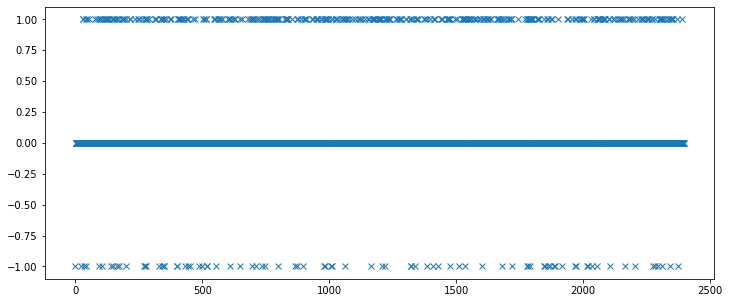

In [171]:
error = ytestNumpyArray - predictions
plt.figure(figsize=(12,5))
plt.plot(error,'x')
error

In [177]:
df = pd.DataFrame([ytestNumpyArray, predictions])
df.T

,0,1
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2394,0,0
2395,0,0
2396,1,1
2397,0,0
